# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Hisbullah]
- **Email:** [hisbullahasim638@gmail.com]
- **ID Dicoding:** [hisbullahasim]

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca mempengaruhi jalanya transaksi?
- Baimana Trend peminjaman sepeda sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [29]:
day = pd.read_csv('/content/data/day.csv')
hour = pd.read_csv('/content/data/hour.csv')

**Insight:**

- Hal pertama yang perlu kita lakukan adalah mengimpor semua persyaratan untuk melakukan analisis data seperti pustaka pandas yang digunakan untuk menampilkan data dalam format csv, numpy untuk melakukan konversi array, matloib dan seaborn untuk menampilkan data dalam bentuk grafik
- Selanjutnya, kita perlu menghubungkan ke google drive kita untuk mendapatkan dataset, lalu menyimpannya dalam variabel hari dan jam

### Assessing Data

In [30]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [31]:
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [32]:
print("jumlah Duplikasi :",day.duplicated().sum())

jumlah Duplikasi : 0


In [33]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [35]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [36]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [37]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data diatas adalah data peminjaman sepeda,adapun beberpa masalah yang terlihat pada table ini adalah kesalah type pada dteday yang harusnya date time
- Penulisan atribut yang sulit untuk dipahami
- Terlalu banyak menggunakan atribut yang valuenya sama sehingga mengahilkan data yang tidak rapi.

### Cleaning Data

In [38]:
day['dteday'] = pd.to_datetime(day['dteday'])


In [39]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [40]:
hour['dteday']= pd.to_datetime(hour['dteday'])

In [41]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [42]:
day = day.drop(['yr', 'mnth', 'weekday'], axis=1)


In [43]:
day = day.drop(['workingday'], axis=1)

In [44]:
day.describe()

,instant,dteday,season,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.028728,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,0.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.167155,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [45]:
hour = hour.drop(['yr', 'mnth', 'weekday'], axis=1)

In [46]:
hour = hour.drop(['workingday'], axis=1)

In [47]:
hour.describe()

,instant,dteday,season,hr,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,11.546752,0.028770,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,6.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,18.000000,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,23.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,6.914405,0.167165,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [48]:
day.rename(columns={
    'instant': 'Instant',
    'season': 'Season',
    'dteday': 'Date',
    'weathersit': 'Weather Condition',
    'temp': 'Temperature',
    'atemp': 'Feeling Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'cnt': 'Count',
    'holiday': 'Holiday',
    'holiday': 'Holiday',
    'casual': 'Casual',
    'registered': 'Registered',
}, inplace=True)


In [49]:
day.describe()

,Instant,Date,Season,Holiday,Weather Condition,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual,Registered,Count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.028728,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,0.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.167155,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [50]:
hour.rename(columns={
    'instant': 'Instant',
    'season': 'Season',
    'dteday': 'Date',
    'hr': 'Hour',
    'weathersit': 'Weather Condition',
    'temp': 'Temperature',
    'atemp': 'Feeling Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'cnt': 'Count',
    'holiday': 'Holiday',
    'casual': 'Casual',
    'registered': 'Registered',
}, inplace=True)

In [51]:
hour.describe()

,Instant,Date,Season,Hour,Holiday,Weather Condition,Temperature,Feeling Temperature,Humidity,Wind Speed,Casual,Registered,Count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,11.546752,0.028770,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,6.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,18.000000,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,23.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,6.914405,0.167165,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**

Adapun beberapa perbaikan atau cleaning data yang sy lakukan adalah :
- Mengganti tipe data untuk atribut dteday yang sebelumnya bertipe objek menjadi timer
- Saya juga menghapus beberapa artribut seperti 'yr', 'mnth', 'weekday', Karena menurut sy data ini hanya cukup di tampung oleh atribut date.
- Kemudian sy juga memperbaik penulisan atribut yang sulit di baca sehingga tabel terlihat bersih dan dapat dipahami dengan mudag

## Exploratory Data Analysis (EDA)

### Explore ...

In [52]:
correlations = day[['Temperature', 'Humidity', 'Wind Speed', 'Count']].corr()
print(correlations)

weather_group = day.groupby('Weather Condition')['Count'].mean()
print(weather_group)

             Temperature  Humidity  Wind Speed     Count
Temperature     1.000000  0.126963   -0.157944  0.627494
Humidity        0.126963  1.000000   -0.248489 -0.100659
Wind Speed     -0.157944 -0.248489    1.000000 -0.234545
Count           0.627494 -0.100659   -0.234545  1.000000
Weather Condition
1    4876.786177
2    4035.862348
3    1803.285714
Name: Count, dtype: float64


In [53]:
monthly_transactions = day.groupby('Date')['Count'].sum()
print("Jumlah Peminjaman per Bulan:\n", monthly_transactions)



Jumlah Peminjaman per Bulan:
 Date
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: Count, Length: 731, dtype: int64


**Insight:**

- Jadi pada tahap explor data sy mencoba membuat model untuk menentuka pengaruh cuaca terhadap traksaksi.
- Untuk melakukan analisi ini sy membutuhkan beberapa artibut pada datase yang relevan dengan anlisis sy seperti Temperatur, Humidity, Wind speed, Count.Hal ini dapat mempermudah sy melakukan analisis dengan benar

## Visualization & Explanatory Analysis

### Pertanyaan 1:

             Temperature  Humidity  Wind Speed     Count
Temperature     1.000000  0.126963   -0.157944  0.627494
Humidity        0.126963  1.000000   -0.248489 -0.100659
Wind Speed     -0.157944 -0.248489    1.000000 -0.234545
Count           0.627494 -0.100659   -0.234545  1.000000


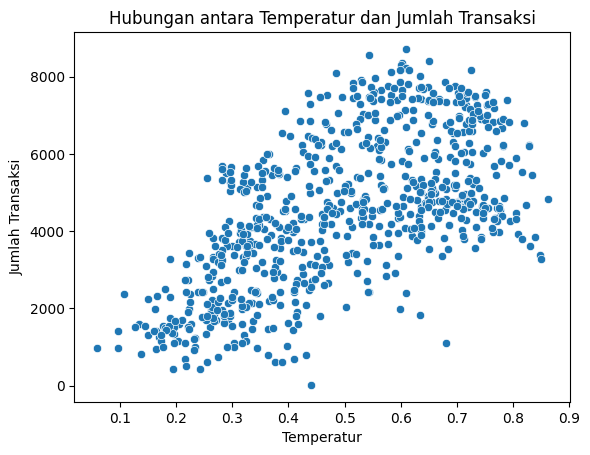

Weather Condition
1    4876.786177
2    4035.862348
3    1803.285714
Name: Count, dtype: float64


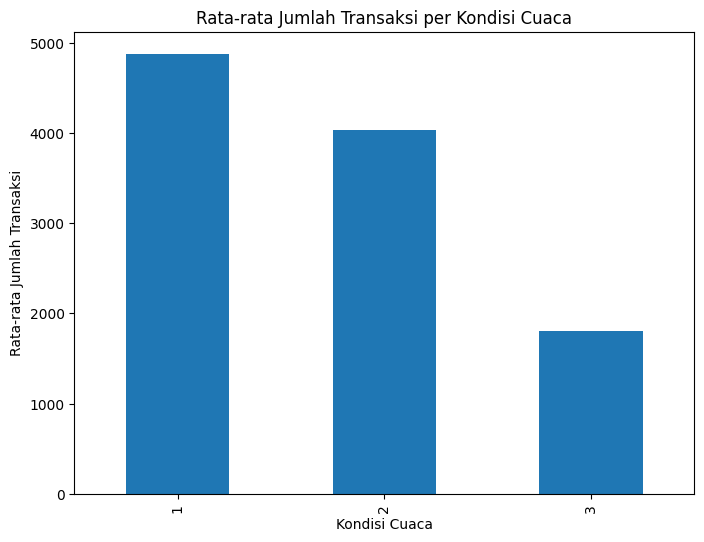

In [54]:
correlations = day[['Temperature', 'Humidity', 'Wind Speed', 'Count']].corr()
print(correlations)

sns.scatterplot(x='Temperature', y='Count', data=day)
plt.title('Hubungan antara Temperatur dan Jumlah Transaksi')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Transaksi')
plt.show()

weather_group = day.groupby('Weather Condition')['Count'].mean()
print(weather_group)

weather_group.plot(kind='bar', figsize=(8, 6))
plt.title('Rata-rata Jumlah Transaksi per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Transaksi')
plt.show()

### Pertanyaan 2:

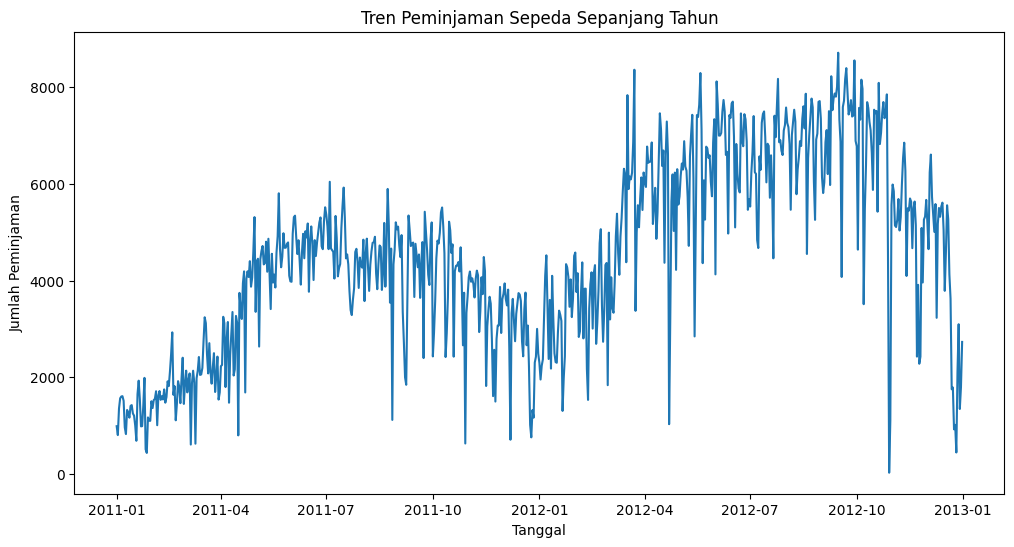

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Count', data=day)
plt.title('Tren Peminjaman Sepeda Sepanjang Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**

- Pertanyaan 1
  
  Pada tahap ini sy melakukan visualisasi data berdasarka data yang sy explor menunjukan bahwa cuaca dapat mempengaruhi transaksi yang cukup signifikat diaman

  - Semakin tinggi suhu semakin banyak yang melakukan peminjaman sepede

  - Semakin tinggi kelembaban maka, semakin sedikit peminjaman sepede

  - Semakin tinggi kecepatan angin maka, semakin sedikit pula peminjaman sepeda

  Adapun data yang menunjukan hal itu adalah sbb

  - Kondisi cuaca yang baik meliputi (cerah, sedikit berawan) memiliki rata-rata peminjaman sepeda tertinggi(4876.786177)

  - Kondisi cuaca sedang seperti berkabut dan berawan memiliki rata-rata peminjaman sebesar (4035.862348)

  - Sedangkan konidisi cuaca yang buruk seperti hujan, salju ringan memiliki pengaruh yang tinggi yaitu dalam peminjaman sepeda yaitu sebesar (1803.285714).

- Pertanyaa 2 :

  Anda dapat melihat bahwa jumlah peminjaman bervariasi dari hari ke hari, dengan beberapa hari memiliki peminjaman yang tinggi dan hari lainnya memiliki peminjaman yang rendah.


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

  Dari kedua output tersebut, dapat disimpulkan bahwa:

  Cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda. Suhu yang lebih tinggi dan kondisi cuaca yang baik cenderung meningkatkan peminjaman sepeda, sedangkan kelembapan dan kecepatan angin yang tinggi cenderung menguranginya.
  Kondisi cuaca yang baik (Weather Condition 1) merupakan faktor penting dalam meningkatkan peminjaman sepeda.

- Conclution pertanyaan 2

  Berdasarkan data tersebut, dapat disimpulkan bahwa jumlah peminjaman sepeda berfluktuasi setiap harinya. Terlihat bahwa ada hari-hari dengan jumlah peminjaman yang tinggi dan ada pula hari-hari dengan jumlah peminjaman yang rendah.

In [61]:
hour.to_csv("clean_data_hour.csv", index=False)

from google.colab import files
files.download("clean_data_hour.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>